In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import models
from keras.preprocessing import image
from keras.applications import VGG16

from keras import backend as K

Using TensorFlow backend.


### Visualize indermediate activations


In [2]:
model = models.load_model('models/cats_and_dog_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

(1, 150, 150, 3)


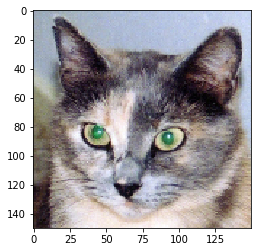

In [3]:
img_path = 'data/cats_and_dogs_small/test/cats/1700.jpg'
img = image.load_img(img_path,target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)
plt.imshow(img_tensor[0]);

In [4]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input,outputs=layer_outputs)

In [5]:
# get activation for each layer ( 5 for current case)
activations = activation_model.predict(img_tensor) # returns a list of 5 numpy arrays
len(activations) # number of layers

8

(1, 148, 148, 32)


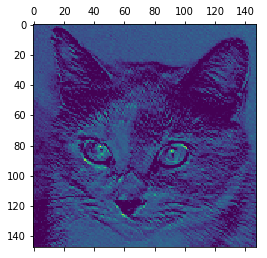

In [6]:
# activation of first convolutional layer for cat image input
first_layer_activation = activations[0]
print(first_layer_activation.shape) # 32 channels/filters
plt.matshow(first_layer_activation[0,:,:,4],cmap='viridis'); # fourth channel

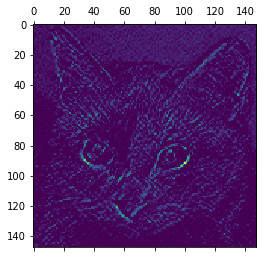

In [7]:
plt.matshow(first_layer_activation[0,:,:,7],cmap='viridis'); # seventh channel of First conv layer

#### Visualise every channel in every intermediate activation 

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


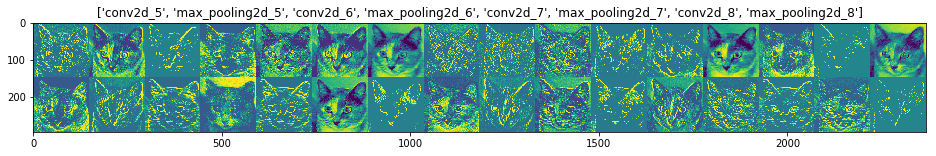

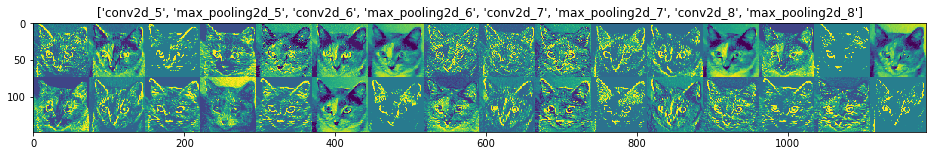

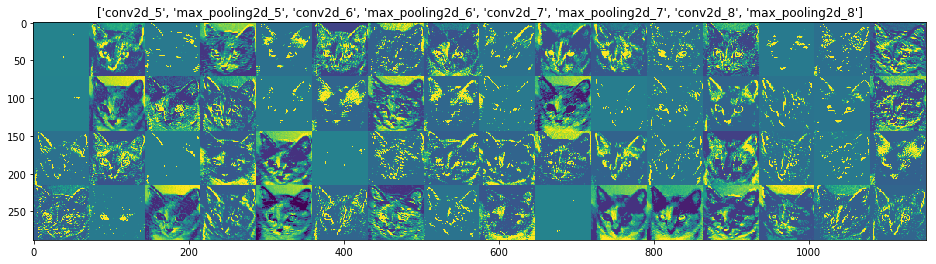

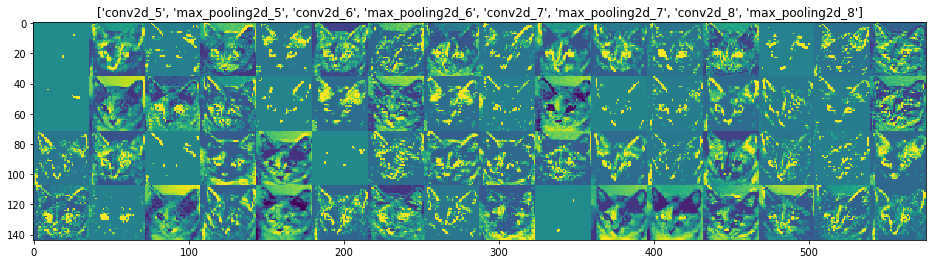

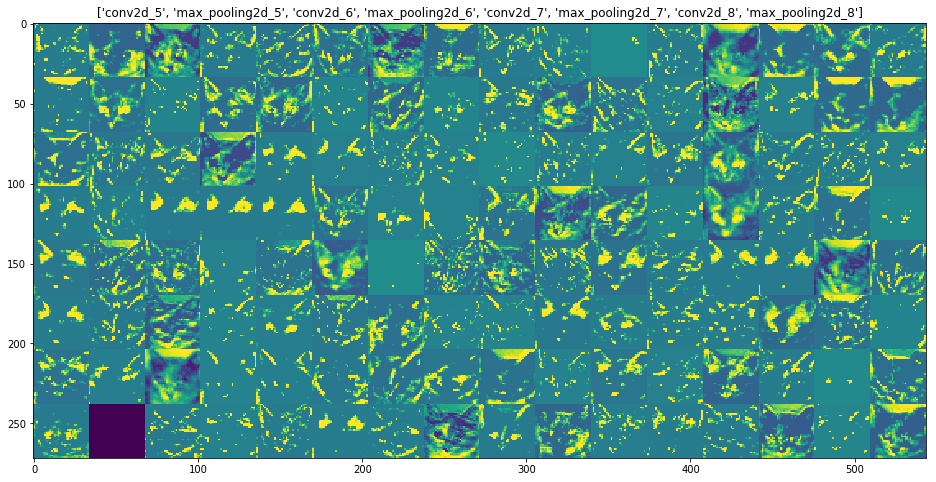

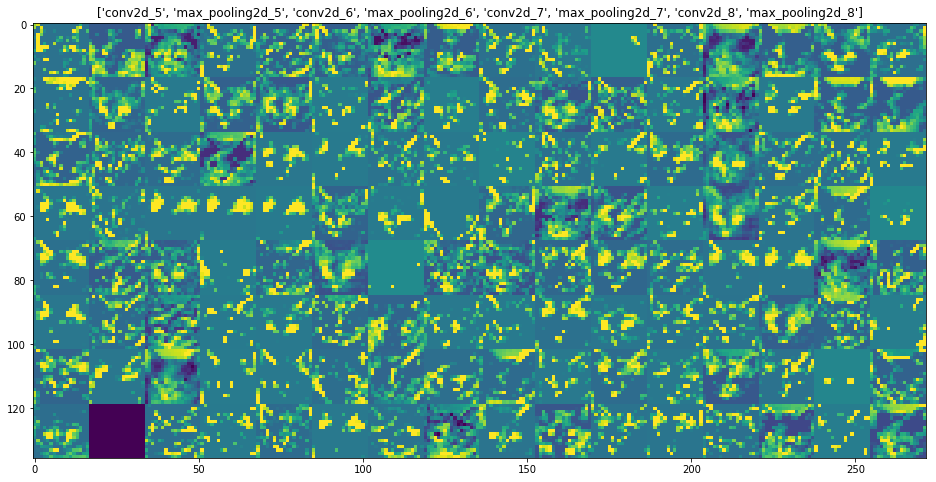

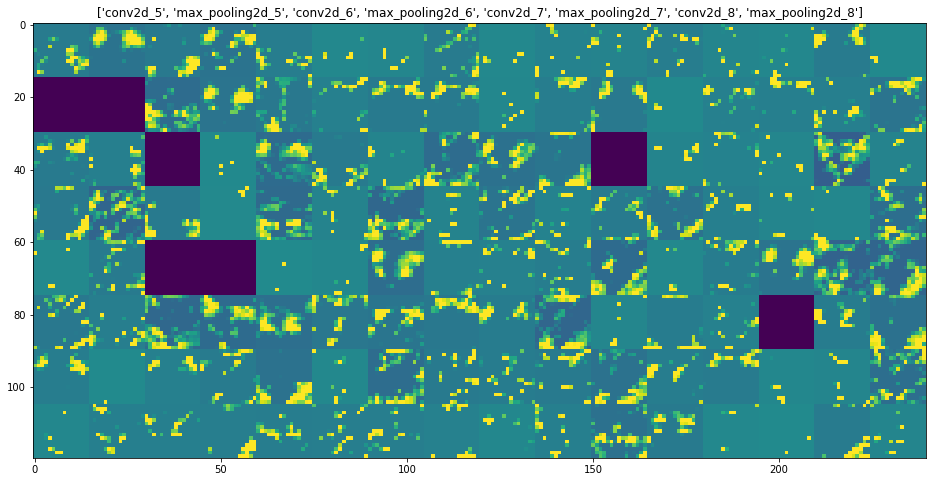

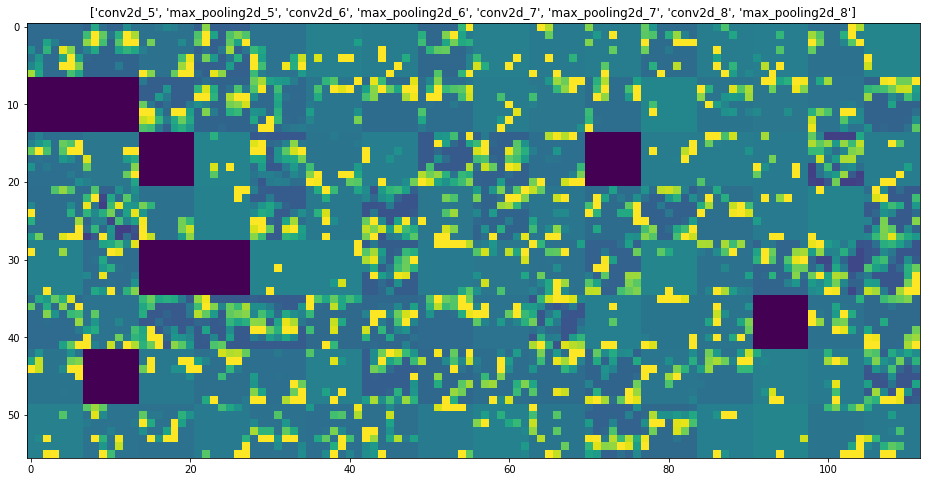

In [8]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names,activations):
    n_features = layer_activation.shape[-1] # no of features in feature map
    
    size = layer_activation.shape[1] 
    # feature map shape (l,size,size,n_features)
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size*n_cols, images_per_row*size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image,0,255).astype('uint8')
            display_grid[col*size:(col+1)*size,
                         row*size:(row+1)*size] = channel_image
            
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],
                        scale*display_grid.shape[0]))
    
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Visualize ConvNet Filters

In [10]:
model_visconv = VGG16(weights='imagenet',
                      include_top=False)
layer_name = 'block3_conv1'
filter_index = 0

layer_output = model_visconv.get_layer(layer_name).output

# loss for the activation of filter 0 in the layer block3_conv1 of the
# VGG16 network, pretrained on ImageNet
loss = K.mean(layer_output[:,:,:,filter_index])

In [15]:
loss.shape

TensorShape([])